In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [10]:
columns = ["id", "diagnosis",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", 
    "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", 
    "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", 
    "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst", 
    "fractal_dimension_worst"
]

In [11]:
df = pd.read_csv("wdbc.data", header=None)
df.columns = columns

print("Dataset Loaded:")
print(df.head())

Dataset Loaded:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter

In [12]:
df = df.drop(['id'], axis=1)
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']


In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("\nExplained variance ratio (2 PCs):", pca.explained_variance_ratio_)


Explained variance ratio (2 PCs): [0.44272026 0.18971182]


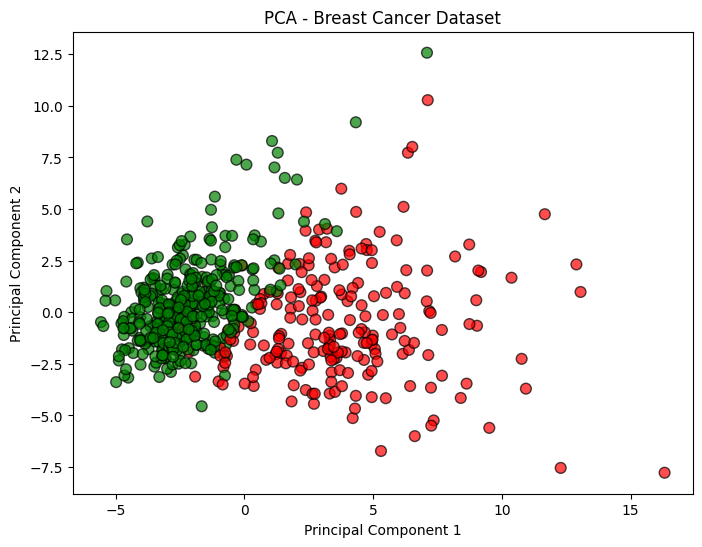

In [15]:
colors = {'M':'red', 'B':'green'}
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y.map(colors), s=60, alpha=0.7, edgecolor='k')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - Breast Cancer Dataset")
plt.show()

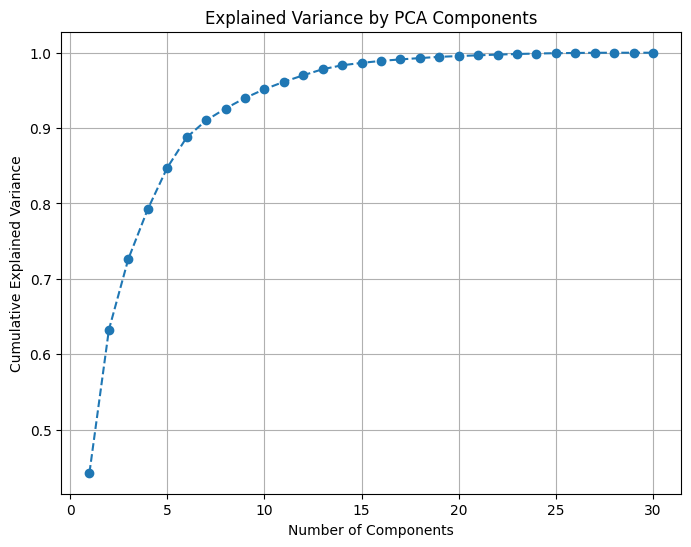

In [16]:
pca_full = PCA()
pca_full.fit(X_scaled)

plt.figure(figsize=(8,6))
plt.plot(range(1, len(pca_full.explained_variance_ratio_)+1),
         np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--')

plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()

In [17]:
df.to_csv("breast_cancer_clean.csv", index=False)
print("\nClean dataset saved as breast_cancer_clean.csv")


Clean dataset saved as breast_cancer_clean.csv
